In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix
#from sklearn import linear_model
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import random
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r'C:\Users\Steve_GA\Siraj_Course\Week3Data\creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,85940.0,-0.818619,0.189509,1.989458,-0.372305,-1.109748,-0.037080,-0.284106,-0.723955,-0.592574,...,0.420277,-0.640192,0.212348,0.301005,-0.129278,-0.590952,0.066922,0.012259,64.00,0
1,57840.0,-4.012829,3.565186,0.005870,-1.184131,-0.438507,-0.581776,0.864447,-0.134120,2.971912,...,-0.861574,-0.873554,0.019872,-0.109911,0.540249,0.037636,1.115239,0.233959,10.74,0
2,156735.0,-1.751241,0.174618,1.437530,-2.711381,0.307871,-0.676743,0.166722,0.388370,0.487620,...,-0.183241,-0.653694,-0.358465,-0.491331,0.373742,0.259747,-0.228473,-0.225188,12.95,0
3,38031.0,1.378679,-1.141136,0.580519,-1.243650,-1.631288,-0.650375,-0.958775,-0.100966,-1.960371,...,-0.296163,-0.475640,0.063262,0.514885,0.304537,-0.334786,0.027275,0.019436,49.41,0
4,139305.0,2.072154,0.140135,-1.774013,0.385604,0.495339,-0.786266,0.200156,-0.235419,0.485280,...,-0.369110,-0.967207,0.312642,0.382648,-0.235751,0.180165,-0.063465,-0.030515,8.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.098531e-15,3.355220e-16,-1.393376e-15,2.102627e-15,1.032849e-15,1.509140e-15,-5.718123e-16,1.244756e-16,-2.426869e-15,...,1.519421e-16,-3.385481e-16,2.725755e-16,4.471894e-15,5.251082e-16,1.682782e-15,-3.701261e-16,-1.263094e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


In [5]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]
#print(len(fraud))
#print(non_fraud)
print(len(fraud))
print(len(non_fraud))

492
284315


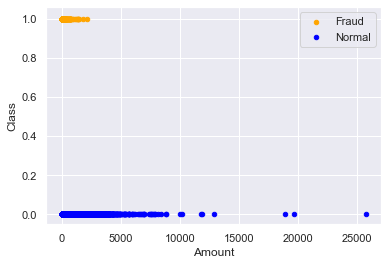

In [6]:
ax = fraud.plot.scatter(x='Amount',y='Class', color='Orange', label='Fraud')
non_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax= ax)
plt.show()


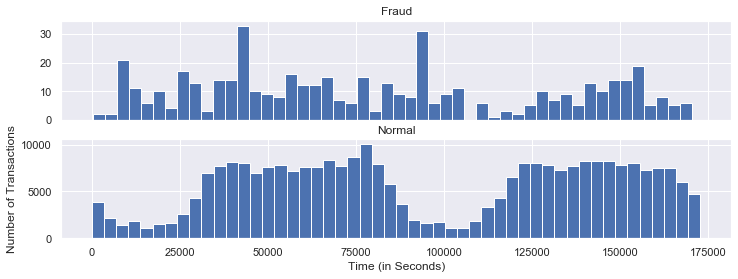

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [8]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


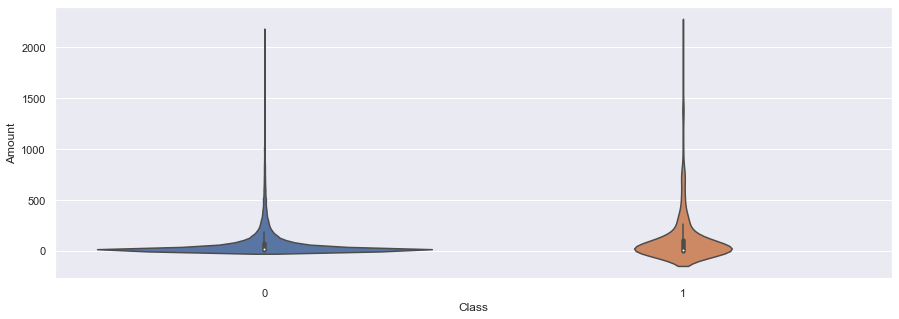

In [9]:
f, ax = plt.subplots(figsize=(15, 5))
#ax = sns.violinplot(x="Class", y="Amount", data=df, scale="area")
#ax = sns.violinplot(x=df.Amount[df.Class == 1], y="Amount", data=df, scale="area")
#ax = sns.violinplot(x=df.Amount[df.Class == 1], y=df.Amount[df.Amount<=2500], data=df, scale="area")
ax = sns.violinplot(x="Class",y=df.Amount[df.Amount<=2150], data=df, scale="area")

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
x = df.iloc[:, :-1]
#y = df['Class']
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.35)

In [12]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test))


C:\Users\Steve_GA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.999127233329655


In [13]:
print(confusion_matrix(y_test, logistic.predict(X_test)))

[[99483    33]
 [   54   113]]


In [14]:
df.columns = [x.lower() for x in df.columns]
df.rename(columns = {'class': 'fraud'}, inplace = True)

In [15]:
df.groupby('fraud').amount.max()

fraud
0    25691.16
1     2125.87
Name: amount, dtype: float64

In [16]:
df.groupby('fraud').amount.mean()

fraud
0     88.291022
1    122.211321
Name: amount, dtype: float64

In [17]:
from sklearn.metrics import roc_curve, log_loss, auc, roc_auc_score, recall_score

In [18]:
y_train_pred_prob = logistic.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
# Default 0.5 Threshold
roc = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Thresholds':thresholds})

Text(0, 0.5, 'TPR')

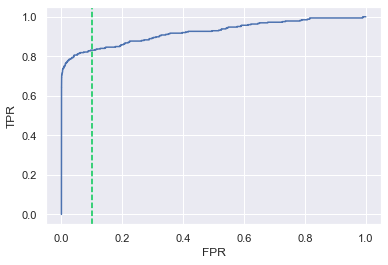

In [19]:
_ = plt.figure()
plt.plot(roc.FPR, roc.TPR)
plt.axvline(0.1, color = '#00c851', linestyle = '--')
plt.xlabel("FPR")
plt.ylabel("TPR")